# CSIS 3290: Fundamentals of Machine Learning
## Project:  BitcoinHeist Analysis
- **Student Name:** Minal Dhansukhlal
- **Student ID:** 300318615

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

## Reading Dataset

In [2]:
BitcoinHeistData = pd.read_csv('Dataset/BitcoinHeistData.csv')
# Getting a peak of the data
BitcoinHeistData.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [3]:
# Data types of the variables
BitcoinHeistData.dtypes

address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object

In [4]:
# Shape of the data, it has 2916697 rows and 10 columns
BitcoinHeistData.shape

(2916697, 10)

In [5]:
# Checking data for null values
BitcoinHeistData.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [6]:
#Getting counts of each label in dataset
BitcoinHeistData['label'].value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealVenusLocker                  7
montrealXLockerv5.0                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

## Data Preparation

### Converting year and day column

In [7]:
#Converting year and day column to have a column in date format
from datetime import datetime

b=[]

for d,y in zip(BitcoinHeistData.day, BitcoinHeistData.year): 
    day_num = str(d)
    year = str(y)

    # converting to date
    res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%d-%m-%Y")
    dates=pd.to_datetime(res)
    b.append(dates)
    
BitcoinHeistData['date']=b

In [8]:
#Converting year and day column to have a column in continuous decimal values format

a=[]
for d,y in zip(BitcoinHeistData.day,BitcoinHeistData.year): 
        days=d/366
        yrs=int(str(y)[-2:])
        a.append(yrs+days)
BitcoinHeistData['date_2']=a

In [9]:
#Dropping day and year columns as they are not required for further analysis
BitcoinHeistData.drop(['day','year'], axis=1, inplace=True)
BitcoinHeistData.head()

,address,length,weight,count,looped,neighbors,income,label,date,date_2
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,18,0.008333,1,0,2,100050000.0,princetonCerber,2017-11-01,17.030055
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,44,0.000244,1,0,1,100000000.0,princetonLocky,2016-11-05,16.360656
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,0,1.000000,1,0,2,200000000.0,princetonCerber,2016-02-09,16.672131
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,72,0.003906,1,0,2,71200000.0,princetonCerber,2016-11-17,16.879781
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,144,0.072848,456,0,1,200000000.0,princetonLocky,2016-08-25,16.650273


### Label Encoding Label column and Address column

In [10]:
# Label Encoder was used to get integer value to labels and addresses in the dataset
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
BitcoinHeistData['category']= label_encoder.fit_transform(BitcoinHeistData['label']) 
BitcoinHeistData['address']=label_encoder.fit_transform(BitcoinHeistData['address'])

BitcoinHeistData.head()

,address,length,weight,count,looped,neighbors,income,label,date,date_2,category
0,23,18,0.008333,1,0,2,100050000.0,princetonCerber,2017-11-01,17.030055,26
1,128,44,0.000244,1,0,1,100000000.0,princetonLocky,2016-11-05,16.360656,27
2,169,0,1.000000,1,0,2,200000000.0,princetonCerber,2016-02-09,16.672131,26
3,217,72,0.003906,1,0,2,71200000.0,princetonCerber,2016-11-17,16.879781,26
4,293,144,0.072848,456,0,1,200000000.0,princetonLocky,2016-08-25,16.650273,27


### Obtaining a fraction of white labeled data for main dataframe

In [11]:
# Separating White labels from the dataset
df_white=BitcoinHeistData[BitcoinHeistData.label=='white']
df_white.head()

,address,length,weight,count,looped,neighbors,income,label,date,date_2,category
41413,821446,0,1.0,1,0,1,5.000000e+09,white,2011-01-01,11.002732,28
41414,1420912,0,1.0,1,0,2,5.000000e+09,white,2011-01-01,11.002732,28
41415,835895,0,1.0,1,0,2,9.150000e+08,white,2011-01-01,11.002732,28
41416,723300,0,1.0,1,0,2,3.402500e+10,white,2011-01-01,11.002732,28
41417,640301,0,1.0,1,0,2,1.275100e+10,white,2011-01-01,11.002732,28


In [12]:
# Obtaining a fraction of white labeled data 
df_white = df_white.sample(frac=0.01)
df_white.shape

(28753, 11)

In the dataset, we saw that very high percentage of the data is white labeled data which will not be equivalent to other labels. Therefore I decided to obtain a small fraction of white labeled data and append it to the other labeled dataframe so as to obtain a bit balanced data

In [13]:
df_notWhite=BitcoinHeistData.copy()
df_notWhite
i=df_notWhite.loc[df_notWhite.label=='white'].index
df_notWhite.drop(i, inplace=True)
df = df_notWhite.append(df_white)

### Dropping Labels with Count less than 100

In [14]:
df.loc[df['label'].str.contains('(?i)montreal'), 'ransomware_family'] = 'Montreal'
df.loc[df['label'].str.contains('(?i)padua'), 'ransomware_family'] = 'Padua'
df.loc[df['label'].str.contains('(?i)princeton'), 'ransomware_family'] = 'Princeton'
df.loc[df['label'].str.contains('(?i)white'), 'ransomware_family'] = 'Normal'

df

,address,length,weight,count,looped,neighbors,income,label,date,date_2,category,ransomware_family
0,23,18,0.008333,1,0,2,1.000500e+08,princetonCerber,2017-11-01,17.030055,26,Princeton
1,128,44,0.000244,1,0,1,1.000000e+08,princetonLocky,2016-11-05,16.360656,27,Princeton
2,169,0,1.000000,1,0,2,2.000000e+08,princetonCerber,2016-02-09,16.672131,26,Princeton
3,217,72,0.003906,1,0,2,7.120000e+07,princetonCerber,2016-11-17,16.879781,26,Princeton
4,293,144,0.072848,456,0,1,2.000000e+08,princetonLocky,2016-08-25,16.650273,27,Princeton
...,...,...,...,...,...,...,...,...,...,...,...,...
1290074,755424,144,0.003939,1329,1260,2,1.490000e+08,white,2014-06-13,14.448087,28,Normal
1025832,1961335,0,1.000000,1,0,2,1.000000e+09,white,2013-09-22,13.724044,28,Normal
2702567,1674014,18,0.500000,1,0,2,1.620163e+08,white,2018-04-26,18.316940,28,Normal
2382335,628855,2,0.250000,1,0,2,1.190419e+08,white,2017-10-06,17.439891,28,Normal


In [15]:
df['ransomware_family']= label_encoder.fit_transform(df['ransomware_family']) 

In [16]:
df

,address,length,weight,count,looped,neighbors,income,label,date,date_2,category,ransomware_family
0,23,18,0.008333,1,0,2,1.000500e+08,princetonCerber,2017-11-01,17.030055,26,3
1,128,44,0.000244,1,0,1,1.000000e+08,princetonLocky,2016-11-05,16.360656,27,3
2,169,0,1.000000,1,0,2,2.000000e+08,princetonCerber,2016-02-09,16.672131,26,3
3,217,72,0.003906,1,0,2,7.120000e+07,princetonCerber,2016-11-17,16.879781,26,3
4,293,144,0.072848,456,0,1,2.000000e+08,princetonLocky,2016-08-25,16.650273,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1290074,755424,144,0.003939,1329,1260,2,1.490000e+08,white,2014-06-13,14.448087,28,1
1025832,1961335,0,1.000000,1,0,2,1.000000e+09,white,2013-09-22,13.724044,28,1
2702567,1674014,18,0.500000,1,0,2,1.620163e+08,white,2018-04-26,18.316940,28,1
2382335,628855,2,0.250000,1,0,2,1.190419e+08,white,2017-10-06,17.439891,28,1


## Exploratory Data Analysis

### Distribution Plots

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Category Distribution')

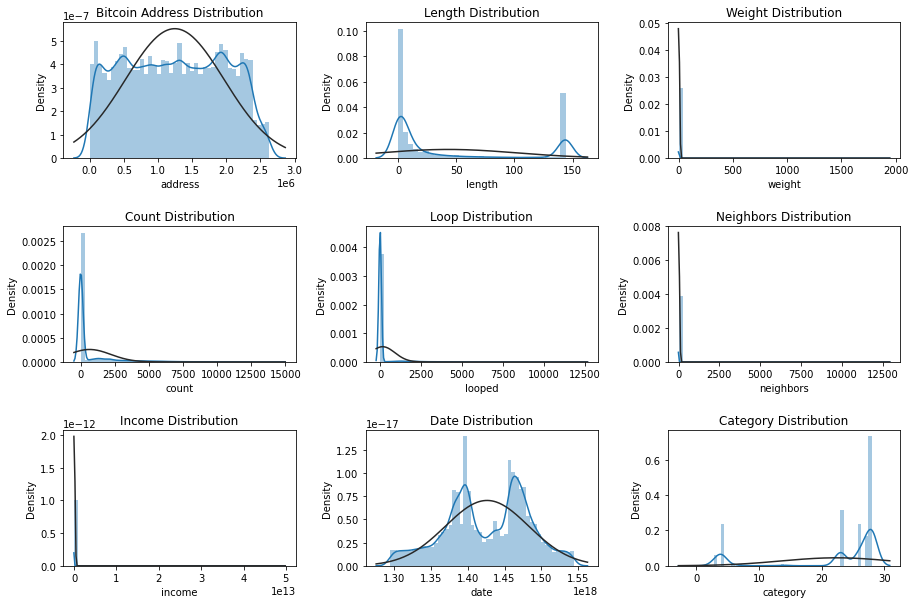

In [17]:
fig, ax =plt.subplots(3,3,figsize=(15, 10))
sns.distplot(df.address,fit=norm, ax=ax[0][0])
sns.distplot(df.length,fit=norm, ax=ax[0][1])
sns.distplot(df.weight,fit=norm, ax=ax[0][2])
sns.distplot(df['count'],fit=norm, ax=ax[1][0])
sns.distplot(df.looped,fit=norm, ax=ax[1][1])
sns.distplot(df.neighbors,fit=norm, ax=ax[1][2])
sns.distplot(df.income,fit=norm, ax=ax[2][0])
sns.distplot(df.date,fit=norm, ax=ax[2][1])
sns.distplot(df.category,fit=norm, ax=ax[2][2])
plt.subplots_adjust(wspace=0.3, hspace=0.5)
ax[0][0].set_title('Bitcoin Address Distribution')
ax[0][1].set_title('Length Distribution')
ax[0][2].set_title('Weight Distribution')
ax[1][0].set_title('Count Distribution')
ax[1][1].set_title('Loop Distribution')
ax[1][2].set_title('Neighbors Distribution')
ax[2][0].set_title('Income Distribution')
ax[2][1].set_title('Date Distribution')
ax[2][2].set_title('Category Distribution')

From the distribution plots, it is visible that the dataset is not perfect dataset because most of the feature have high peak on the left and to the right it is flat. But I decided not to alter the distribution of features currently as it seems all features have such distribution.

In the modelling if I will not be able to get good accuracy and a good model using this data distribution I will try normalize the data then

In [18]:
#I removed income data points because there was a big gap between 75th percentile and max value
index_income=df.loc[df.income > 4.450000e+9].index
index_income
df.drop(index_income, inplace=True)

### Summary Statistics

In [19]:
# Getting summary statistics on the data
df.describe()

,address,length,weight,count,looped,neighbors,income,date_2,category,ransomware_family
count,6.654300e+04,66543.000000,6.654300e+04,66543.000000,66543.000000,66543.000000,6.654300e+04,66543.000000,66543.000000,66543.000000
mean,1.245142e+06,42.896984,5.242287e-01,659.470192,148.796042,1.928993,4.035682e+08,15.280587,22.287393,1.467562
std,7.229581e+05,58.748882,7.776684e-01,1555.812330,733.505299,1.777389,6.902626e+08,1.737331,8.822874,1.049894
min,2.000000e+01,0.000000,3.808640e-76,1.000000,0.000000,1.000000,3.000000e+07,11.002732,0.000000,0.000000
25%,6.121060e+05,0.000000,3.776113e-02,1.000000,0.000000,1.000000,7.810636e+07,13.984973,23.000000,1.000000
50%,1.251863e+06,8.000000,2.980028e-01,1.000000,0.000000,2.000000,1.326244e+08,15.500000,26.000000,1.000000
75%,1.878668e+06,92.000000,1.000000e+00,33.000000,0.000000,2.000000,3.710663e+08,16.614754,28.000000,2.000000
max,2.631026e+06,144.000000,3.000000e+01,14494.000000,12420.000000,104.000000,4.449456e+09,18.901639,28.000000,3.000000


### Correlation Heatmap

<AxesSubplot:>

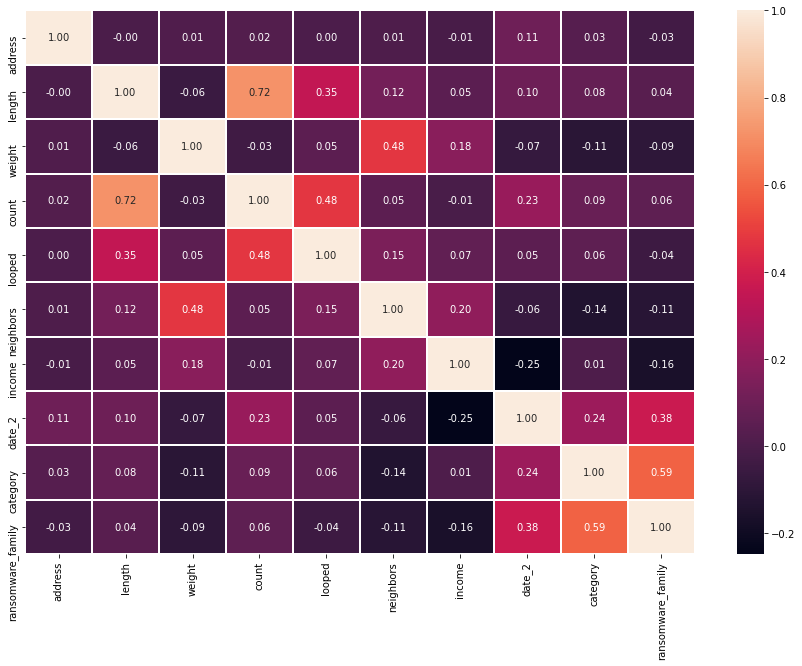

In [20]:
# correlation of all the features in the data, colors indicating the strength of the relationship
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cbar=True, annot=True, fmt = '.2f', linewidths=1,
            yticklabels=df.corr().columns,
            xticklabels=df.corr().columns)

From correlation table we can see string relationship of features with each other but the is very low relationship with category. From the correlation table we can not select some features for further analysis

### Bar Chart

<AxesSubplot:title={'center':'Count of Labels'}>

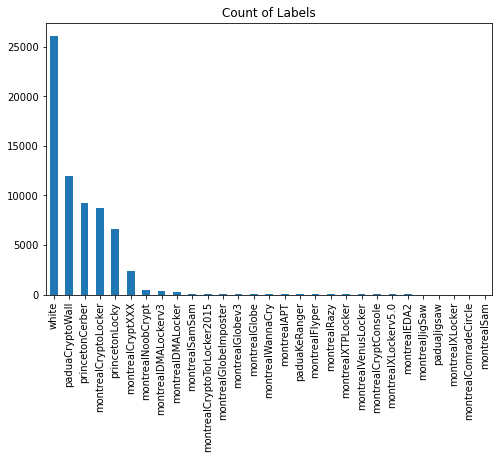

In [21]:
plt.figure(figsize=(8,5))
df['label'].value_counts().plot(kind='bar', title="Count of Labels")

From the bar chart we can see that yet white labels are more than any other labels

### Scatter Plot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Date versus Income for Ransomaware Families')

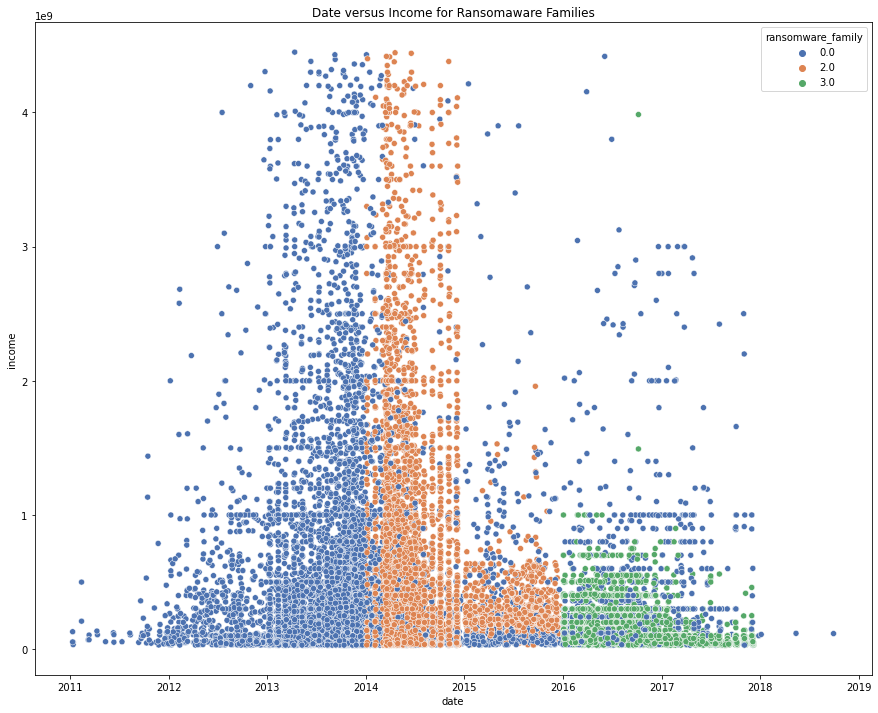

In [22]:
plt.figure(figsize = (15,12))
labs=df.ransomware_family[df.ransomware_family!=1]
sns.scatterplot(df.date, df.income, hue = labs, palette='deep')
plt.title("Date versus Income for Ransomaware Families")

The scatter plot shows many things.
- The families have most transactions from a certain period to another, then another ransomware family rises from an year. Montreal was active from 2011 to 2014 then from 2014 to 2016 Padua was active. 
- Most heist were done from the year 2013 to 2015

### Boxplot

[Text(0, 0, 'princetonCerber'),
 Text(1, 0, 'princetonLocky'),
 Text(2, 0, 'montrealCryptoLocker'),
 Text(3, 0, 'montrealCryptXXX'),
 Text(4, 0, 'paduaCryptoWall'),
 Text(5, 0, 'montrealWannaCry'),
 Text(6, 0, 'montrealDMALockerv3'),
 Text(7, 0, 'montrealCryptoTorLocker2015'),
 Text(8, 0, 'montrealSamSam'),
 Text(9, 0, 'montrealFlyper'),
 Text(10, 0, 'montrealNoobCrypt'),
 Text(11, 0, 'montrealDMALocker'),
 Text(12, 0, 'montrealGlobe'),
 Text(13, 0, 'montrealEDA2'),
 Text(14, 0, 'paduaKeRanger'),
 Text(15, 0, 'montrealVenusLocker'),
 Text(16, 0, 'montrealXTPLocker'),
 Text(17, 0, 'paduaJigsaw'),
 Text(18, 0, 'montrealGlobev3'),
 Text(19, 0, 'montrealJigSaw'),
 Text(20, 0, 'montrealXLockerv5.0'),
 Text(21, 0, 'montrealXLocker'),
 Text(22, 0, 'montrealRazy'),
 Text(23, 0, 'montrealCryptConsole'),
 Text(24, 0, 'montrealGlobeImposter'),
 Text(25, 0, 'montrealSam'),
 Text(26, 0, 'montrealComradeCircle'),
 Text(27, 0, 'montrealAPT'),
 Text(28, 0, 'white')]

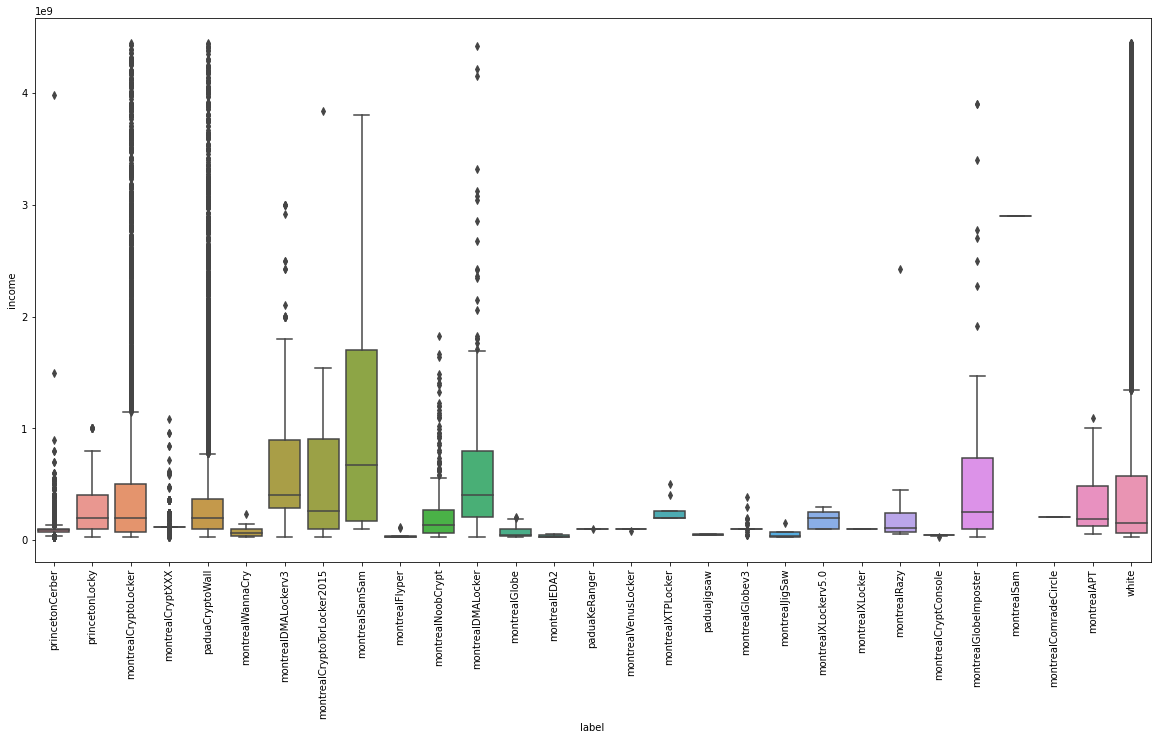

In [23]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(x='label', y='income', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Pairplot

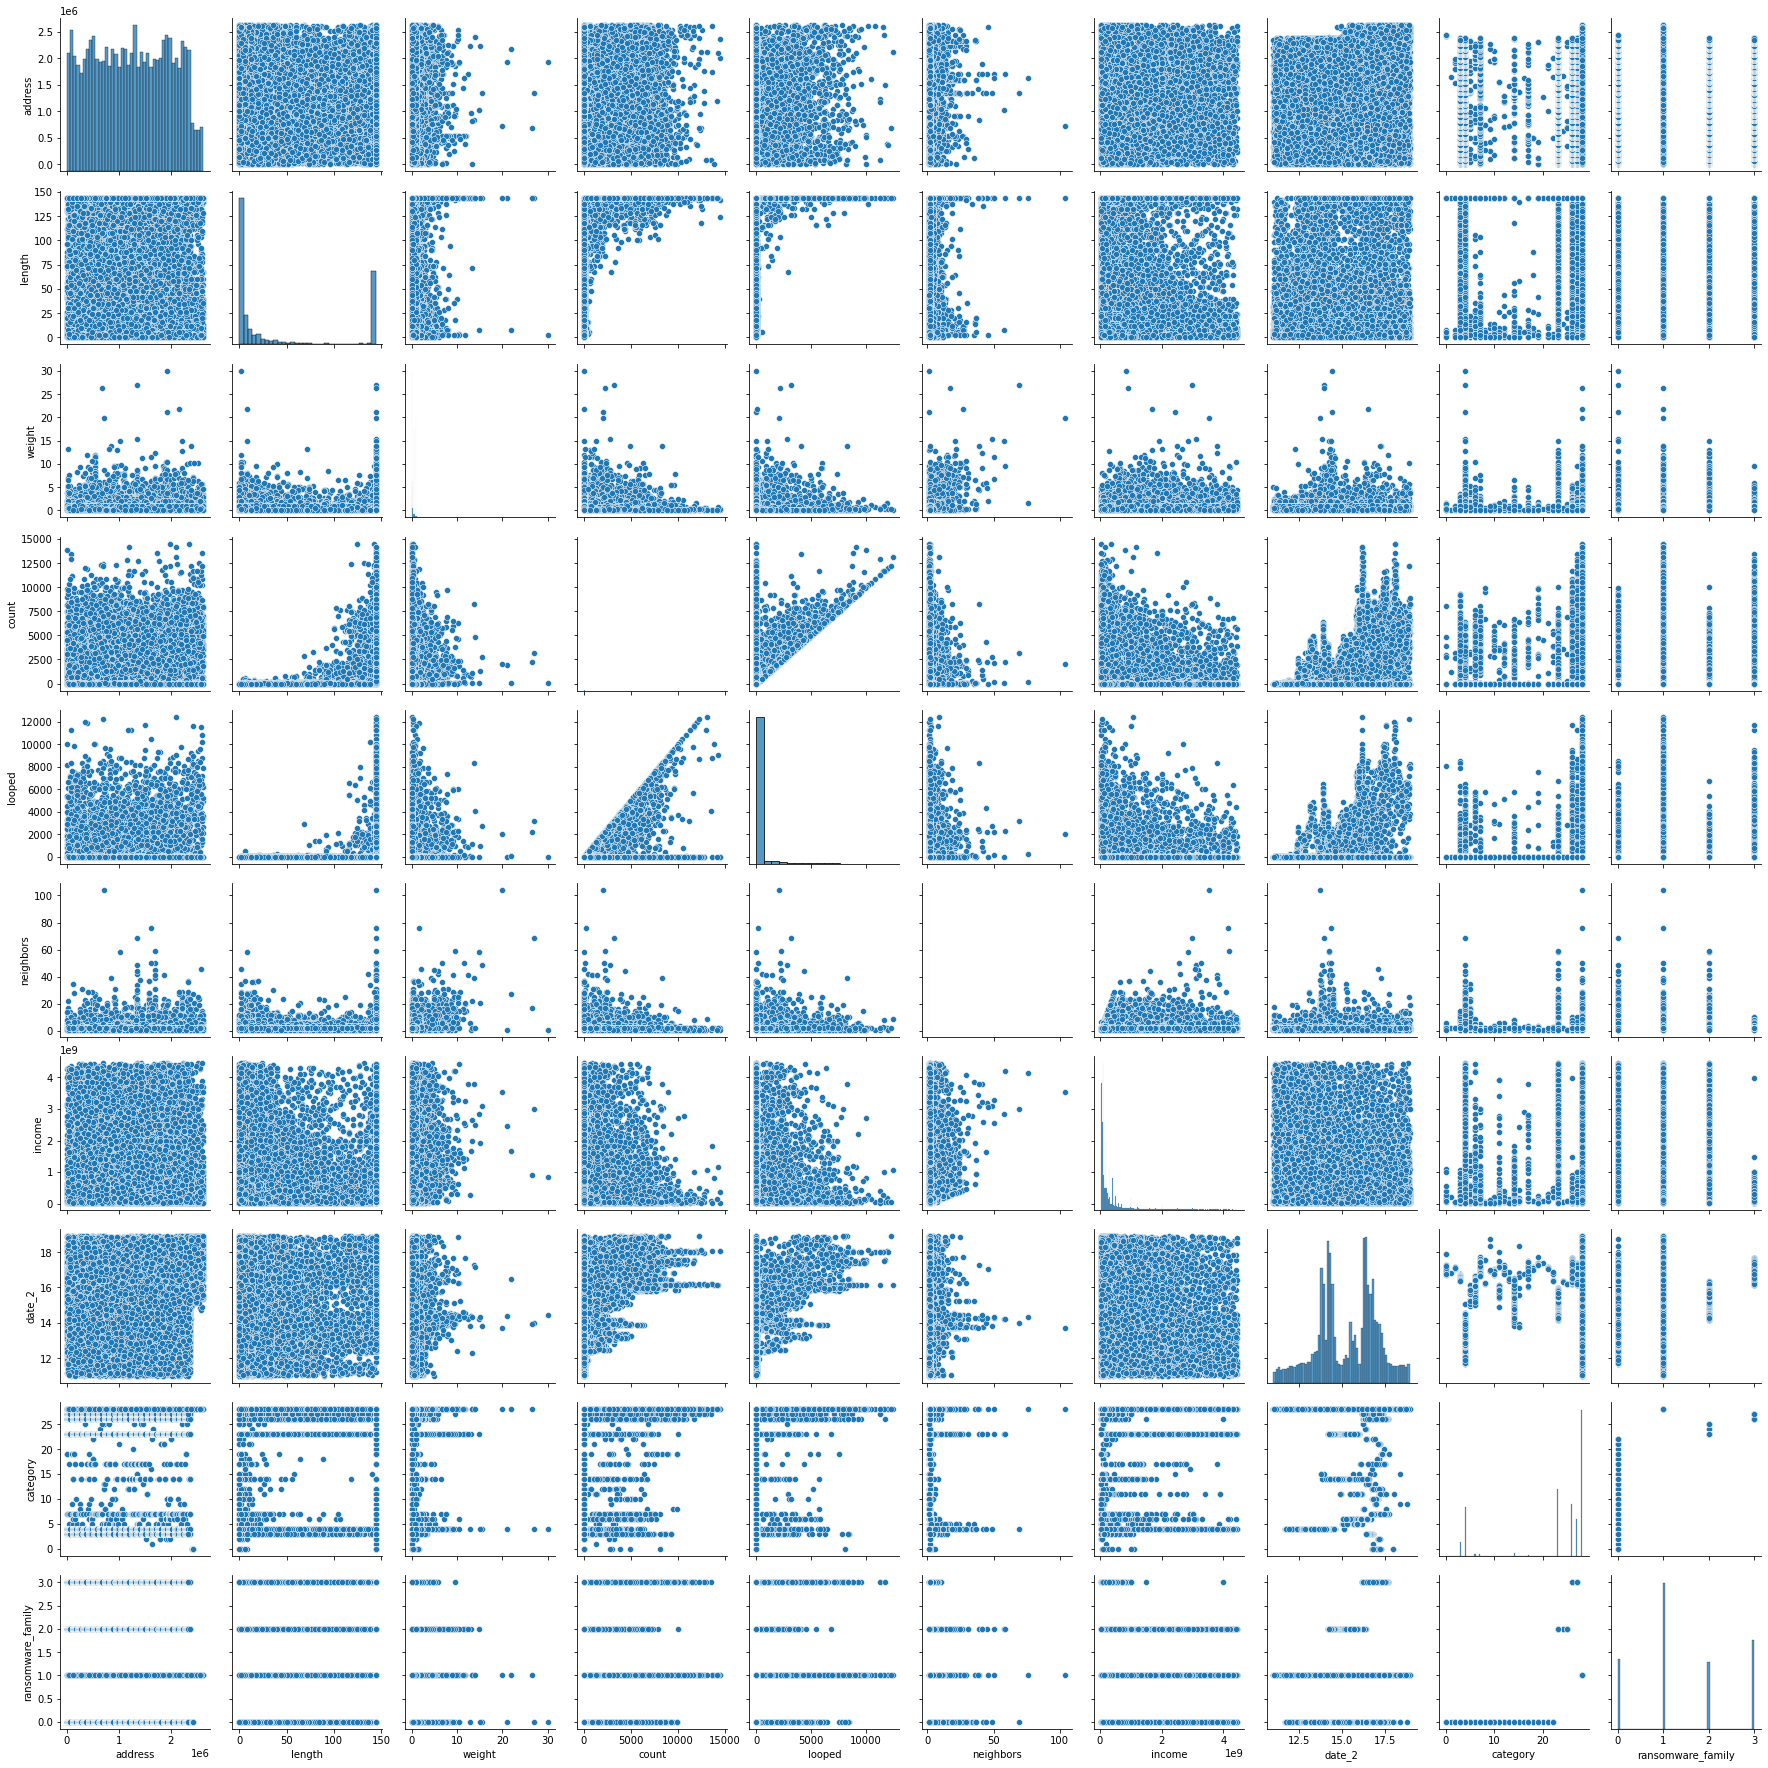

In [24]:
sns.pairplot(df)

### Profile Report

In [25]:
# pip install pandas-profiling
from pandas_profiling import ProfileReport
profile= ProfileReport(df,"Bitcoin Heist Report", html={"style": {'full_width':True}})
profile

In [26]:
# Dropped columns that won't be used in analysis
df.drop(['label','date'], axis=1, inplace=True)

In [27]:
df.shape

(66543, 10)

In [28]:
df.to_csv('Dataset/Project_MDh18615_prepared.csv',index=False) 

## Feature Selection

In [29]:
y = df.category
ransomware_fam=df.ransomware_family
X = df.drop(['category','ransomware_family'], axis=1)

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler


rs = RobustScaler()
scaled_features = rs.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)
scaled_df.head()

,address,length,weight,count,looped,neighbors,income,date_2
0,-0.988376,0.108696,-0.301037,0.00000,0.0,0.0,-0.111191,0.581818
1,-0.988294,0.391304,-0.309444,0.00000,0.0,-1.0,-0.111361,0.327273
2,-0.988261,-0.086957,0.729546,0.00000,0.0,0.0,0.229982,0.445714
3,-0.988223,0.695652,-0.305638,0.00000,0.0,0.0,-0.209668,0.524675
4,-0.988163,1.478261,-0.233990,14.21875,0.0,-1.0,0.229982,0.437403


### Method 1: Variance Threshold

In [31]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=1)

vt.fit(scaled_df)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=X.columns).T

,address,length,weight,count,looped,neighbors,income,date_2
variance,0.325812,0.407772,0.653155,2363.78,538022,3.15906,5.55144,0.436435
select_feature,False,False,False,True,True,True,True,False


In [32]:
X_1 = X.iloc[:,vt.get_support()]
print(X_1.shape)
X_1.head()

(66543, 4)


,count,looped,neighbors,income
0,1,0,2,100050000.0
1,1,0,1,100000000.0
2,1,0,2,200000000.0
3,1,0,2,71200000.0
4,456,0,1,200000000.0


### Method 2: SelectKBest with f_classif

In [33]:
kbest = SelectKBest(score_func=f_classif, k=7)

kbest.fit_transform(X, y)
X_2 = X.iloc[:,kbest.get_support()]
X_2.head()

,length,weight,count,looped,neighbors,income,date_2
0,18,0.008333,1,0,2,100050000.0,17.030055
1,44,0.000244,1,0,1,100000000.0,16.360656
2,0,1.000000,1,0,2,200000000.0,16.672131
3,72,0.003906,1,0,2,71200000.0,16.879781
4,144,0.072848,456,0,1,200000000.0,16.650273


### Method 3: SelectFromModel with Linear SVM

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
LinearSVC = SelectFromModel(estimator=LinearSVC(C = 5 , max_iter=5000,dual=False)).fit(scaled_df, y)
LinearSVC_features = LinearSVC.get_support(indices=True)
len(LinearSVC_features)
X_3 = X.iloc[:,LinearSVC.get_support(indices=True)]
X_3.head()

,weight,neighbors,income,date_2
0,0.008333,2,100050000.0,17.030055
1,0.000244,1,100000000.0,16.360656
2,1.000000,2,200000000.0,16.672131
3,0.003906,2,71200000.0,16.879781
4,0.072848,1,200000000.0,16.650273


From feature selection methods, I am able to see most features are repetitive except address therefore I am going with X_2

## Classification Modelling

For classification, I tried using dataset with and without the Address to identify if there is any significcant difference to the accuracy of the model is the feature is included.
On this stage, I have tried to do classification using different target groups:
 1. In the first stage I used Ransomware family as target therefore I am having 4 classes in the target column
 2. I grouped the records into groups by ransomware family, there are 3 dataframes. There after modelled the groups and used 
     'Category' as the target a certain group. For example Padua had paduaJigsaw, paduaKeRanger and paduaCryptowall
 3. In the last part I modelled using 'Category' without grouping.
 
I did the above stages so that I can identify the difference in accuracy and also obtain method to get most accurate results since I have many classes in 'Category' and the dataset is not balanced.

### Classification with Ransomware Family as Target (Montreal, Princeton, Padua, Normal)

In [35]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import xgboost
from sklearn.model_selection import train_test_split

In [36]:
family=df.ransomware_family
category=df.category
features=df.drop(['ransomware_family','category'], axis=1)

#### With Address in Features

In [37]:
df_copy_withAddress = df.copy()
df_copy_withoutAddress = df.copy()

family_copy_withAddress=df_copy_withAddress.ransomware_family
category_copy_withAddress=df_copy_withAddress.category
features_copy_withAddress=df_copy_withAddress.drop(['ransomware_family','category'], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_copy_withAddress, family_copy_withAddress, test_size=0.25, random_state=42)

In [39]:
test_scores = []
train_scores = []
names=[]
clfs = [
    LogisticRegression(max_iter=5000),
    KNeighborsClassifier(),
    SVC(C=50, degree= 2, gamma= 1, kernel= 'rbf'),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    DecisionTreeClassifier(max_depth=4, random_state=42),
    MLPClassifier(hidden_layer_sizes=(10, 30), learning_rate='adaptive', max_iter=5000),
    GaussianNB(),    
    BaggingClassifier(),
    RandomForestClassifier(random_state=42)
]

for clf in clfs:
    pipe=Pipeline([("scaler", MinMaxScaler()),("classifier", clf)])
    pipe.fit(X_train, y_train)
    train_score = pipe.score(X_train, y_train)
    train_scores.append(train_score)
    
    test_score = pipe.score(X_test, y_test)
    test_scores.append(test_score)
    names.append(clf.__class__.__name__)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:42:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [40]:
scores_df = pd.DataFrame(zip(names, train_scores, test_scores), columns=['Classifiers', 'Training Accuracy', 'Testing Accuracy'])
scores_df

,Classifiers,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.445509,0.438507
1,KNeighborsClassifier,0.838820,0.763645
2,SVC,0.751858,0.751202
3,AdaBoostClassifier,0.493959,0.496273
4,XGBClassifier,0.947202,0.913561
5,DecisionTreeClassifier,0.774841,0.774044
6,MLPClassifier,0.821428,0.817985
7,GaussianNB,0.601559,0.600805
8,BaggingClassifier,0.993328,0.887774
9,RandomForestClassifier,1.000000,0.886571


#### Without Address in Features

In [41]:
test_scores1 = []
train_scores1 = []
names1=[]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_2, ransomware_fam, test_size=0.25, random_state=42)

for clf in clfs:
    pipe=Pipeline([("scaler", MinMaxScaler()),("classifier", clf)])
    pipe.fit(X_train1, y_train1)
    train_score = pipe.score(X_train1, y_train1)
    train_scores1.append(train_score)
    
    test_score = pipe.score(X_test1, y_test1)
    test_scores1.append(test_score)
    names1.append(clf.__class__.__name__)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:48:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [42]:
scores_df1 = pd.DataFrame(zip(names1, train_scores1, test_scores1), columns=['Classifiers', 'Training Accuracy', 'Testing Accuracy'])
scores_df1

,Classifiers,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.449676,0.442414
1,KNeighborsClassifier,0.854469,0.801695
2,SVC,0.741860,0.741164
3,AdaBoostClassifier,0.417917,0.424261
4,XGBClassifier,0.916745,0.882544
5,DecisionTreeClassifier,0.764021,0.763585
6,MLPClassifier,0.820927,0.816122
7,GaussianNB,0.599996,0.601767
8,BaggingClassifier,0.990382,0.866735
9,RandomForestClassifier,0.999539,0.870943


Based on the analysis with and without Address, I noticed that the accuracy is higher when Address is included. **XGBClassifier** has the highest accuracy among all the other classifiers. Therefore for further analysis I chose to use all features with XGBClassifier. **XGBClassifier** has the highest accuracy of **0.90** with Address 

### GridSearchCV with XGBClassifier
To choose best parameters for XGBClassifier I am using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

pipe_xgb=Pipeline([("scaler", MinMaxScaler()),("classifier", XGBClassifier(random_state=42,eval_metric='mlogloss'))])
xgb_parameters = {
    "learning_rate" : [0.1,0.2,0.3,0.5],
    "max_depth" : [5,6,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4,0.8]
    }  

classifier_gridsearch = GridSearchCV(XGBClassifier(random_state=42,eval_metric='mlogloss'), param_grid=xgb_parameters,cv = 3,verbose=True)
classifier_gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed: 30.7min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=N

In [44]:
# listing out the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
print("Grid scores for all the models based on CV:\n")
means = classifier_gridsearch.cv_results_['mean_test_score']
stds = classifier_gridsearch.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, classifier_gridsearch.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))

Grid scores for all the models based on CV:

0.87659 (+/-0.00493) for {'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 5}
0.88655 (+/-0.00470) for {'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6}
0.89202 (+/-0.00513) for {'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 7}
0.89284 (+/-0.00491) for {'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 5}
0.89975 (+/-0.00407) for {'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 6}
0.90338 (+/-0.00534) for {'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 7}
0.89953 (+/-0.00546) for {'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 5}
0.90454 (+/-0.00480) for {'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 6}
0.90875 (+/-0.00589) for {'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 7}
0.90504 (+/-0.00314) for {'gamma': 0.0, 'learning_rate': 0.5, 'max_depth': 5}
0.91047 (+/-0.00293) for {'gamma': 0.0, 'learning_rate': 0.5, 'max_depth': 6}
0.91123 (+/-0.00520) for {'gamma': 0.0, 'learning_rate': 0.5, 'max_depth': 7}
0.87727 (+/-0.00609

In [45]:
print("Best parameters set found on development set:", classifier_gridsearch.best_params_)
print("Best model validation accuracy:", classifier_gridsearch.best_score_)

Best parameters set found on development set: {'gamma': 0.4, 'learning_rate': 0.5, 'max_depth': 7}
Best model validation accuracy: 0.9128379361999629


I have obtained best parameter for XGBClassifier which I will use for further stages

### Results with Ransomware  Families

In [46]:
xgb_best = classifier_gridsearch.best_estimator_
y_pred = xgb_best.predict(X_test)
print('Tuned Model Stats:')
print(classification_report(y_test, y_pred, target_names=['Montreal', 'Normal','Padua','Princeton']))

Tuned Model Stats:
              precision    recall  f1-score   support

    Montreal       0.90      0.91      0.91      3141
      Normal       0.93      0.88      0.90      6564
       Padua       0.92      0.97      0.94      2993
   Princeton       0.92      0.96      0.94      3938

    accuracy                           0.92     16636
   macro avg       0.92      0.93      0.92     16636
weighted avg       0.92      0.92      0.92     16636



Precision =  tp / (tp + fp)

**Precision of 0.91 for Montreal**. 2885/(2885+280+1+14). It means that there is 0.91 chances that the prediction is 0 and it is actually 0, but 0.09 chances that the response is 1 or 2 or 3 but it is predicted 0.

**Precision of 0.93 for Normal**. 5703/(209+5703+84+137). It means that there is 0.93 chances that the prediction is 1 and it is actually 1, but 0.07 chances that the response is 0 or 2 or 3 but it is predicted 1.

**Precision of 0.91 for Padua**. 2872/(2872+266+20+0). It means that there is 0.91 chances that the prediction is 2 and it is actually 2, but 0.09 chances that the response is 0 or 1 or 3 but it is predicted 2.

**Precision of 0.92 for Princeton**. 3819/(3819+3+269+46). It means that there is 0.92 chances that the prediction is 3 and it is actually 3, but 0.08 chances that the response is 0 or 1 or 3 but it is predicted 2.

Recall = tp / (tp + fn)

**Recall of 0.91 for Montreal** . 2885/(2885+209+20+46). This means that there is 0.91 chances that the prediction made is correct from 0 records. 0.91 chances that the prediction is 0 from all 0 class in actual data. There is 0.09 chances that the actual class is 0 but the model has predicted to be 1 or 2 or 3

**Recal1 of 0.87 for Normal**. 5703/(5703+280+266+269). There is 0.87 chances that the Predicted value is 1 and it is actually 1 from all the records with 1 class. But there is 0.13 chances that predicted value is 1 but it is predicted 0 or 2 or 3.

**Recal1 of 0.97 for Padua**. 2872/(84+1+2872+3). There is 0.97 chances that the Predicted value is 2 and it is actually 2 from all the records with 2 class. But there is 0.03 chances that predicted value is 2 but it is predicted 0 or 1 or 3.

**Recal1 of 0.96 for Princeton**. 3819/(137+14+3819). There is 0.96 chances that the Predicted value is 3 and it is actually 3 from all the records with 3 class. But there is 0.04 chances that predicted value is  but it is predicted 0 or 1 or 2.

**F-Score**
F-scores of all classes are generally good because they are nearing to 1

In **support** we can see we have many records with Normal class than the rest

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

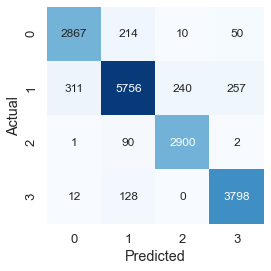

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=6000, square=True, fmt="d", cmap="Blues")

### Classification with Category as Target

In [48]:
df_1=df[df.ransomware_family==0]
df_2=df[df.ransomware_family==2]
df_3=df[df.ransomware_family==3]

#### Model for Ransomware Family 0 (Montreal)

In [49]:
df_1_target=df_1.category
df_1_features=df_1.drop(['category','ransomware_family'], axis=1)

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_1_features, df_1_target, test_size=0.25, random_state=42)

pipe_0=Pipeline([("scaler", MinMaxScaler()),("classifier", XGBClassifier(gamma= 0.1, learning_rate= 0.5, max_depth= 7, random_state=42,eval_metric='mlogloss'))])
pipe_0.fit(X_train2, y_train2)
train_score = pipe_0.score(X_train2, y_train2)
test_score = pipe_0.score(X_test2, y_test2)
y_pred_0=pipe_0.predict(X_test2)
print("Training Score for Class 0 dataset", train_score)
print("Testing Score for Class 0 dataset", test_score)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Score for Class 0 dataset 0.9998938766847076
Testing Score for Class 0 dataset 0.9904519414385742


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

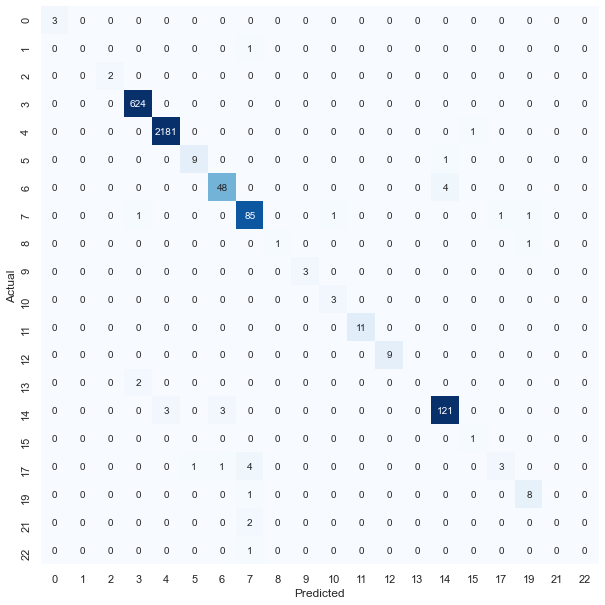

In [51]:
data = confusion_matrix(y_test2, y_pred_0)
df_cm = pd.DataFrame(data, columns=np.unique(y_test2), index = np.unique(y_test2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,15))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10}, cbar=False,
          vmax=100, square=True, fmt="d", cmap="Blues")

In [52]:
from sklearn.metrics import classification_report
print('Tuned Model Stats:')
print(classification_report(y_test2, y_pred_0))

Tuned Model Stats:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00       624
           4       1.00      1.00      1.00      2182
           5       0.90      0.90      0.90        10
           6       0.92      0.92      0.92        52
           7       0.90      0.96      0.93        89
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         3
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         2
          14       0.96      0.95      0.96       127
          15       0.50      1.00      0.67         1
          17       0.75      0.33      0.46         9
        

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model for Ransomware Family 2 (Padua)

In [53]:
df_2_target=df_2.category
df_2_features=df_2.drop(['category','ransomware_family'], axis=1)

In [54]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_2_features, df_2_target, test_size=0.25, random_state=42)

pipe_1=Pipeline([("scaler", MinMaxScaler()),("classifier", XGBClassifier(gamma= 0.1, learning_rate= 0.5, max_depth= 7, random_state=42,eval_metric='mlogloss'))])
pipe_1.fit(X_train3, y_train3)
train_score = pipe_1.score(X_train3, y_train3)
test_score = pipe_1.score(X_test3, y_test3)
y_pred_1=pipe_1.predict(X_test3)
print("Training Score for Class 2 dataset", train_score)
print("Testing Score for Class 2 dataset", test_score)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Score for Class 2 dataset 1.0
Testing Score for Class 2 dataset 1.0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

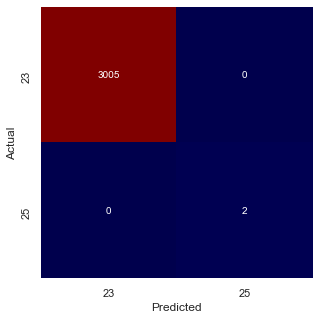

In [55]:
data = confusion_matrix(y_test3, y_pred_1)
df_cm = pd.DataFrame(data, columns=np.unique(y_test3), index = np.unique(y_test3))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10}, cbar=False,
          vmax=200, square=True, fmt="d", cmap="seismic")

In [56]:
print('Tuned Model Stats:')
print(classification_report(y_test3, y_pred_1))

Tuned Model Stats:
              precision    recall  f1-score   support

          23       1.00      1.00      1.00      3005
          25       1.00      1.00      1.00         2

    accuracy                           1.00      3007
   macro avg       1.00      1.00      1.00      3007
weighted avg       1.00      1.00      1.00      3007



#### Model for Ransomware Family 3 (Princeton)

In [57]:
df_3_target=df_3.category
df_3_features=df_3.drop(['category','ransomware_family'], axis=1)

In [58]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_3_features, df_3_target, test_size=0.25, random_state=42)

pipe_2=Pipeline([("scaler", MinMaxScaler()),("classifier", XGBClassifier(gamma= 0.1, learning_rate= 0.5, max_depth= 7, random_state=42,eval_metric='mlogloss'))])
pipe_2.fit(X_train4, y_train4)
train_score = pipe_2.score(X_train4, y_train4)
test_score = pipe_2.score(X_test4, y_test4)
y_pred_2=pipe_2.predict(X_test4)
print("Training Score for Class 3 dataset", train_score)
print("Testing Score for Class 3 dataset", test_score)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Score for Class 3 dataset 1.0
Testing Score for Class 3 dataset 0.9850897144301238


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

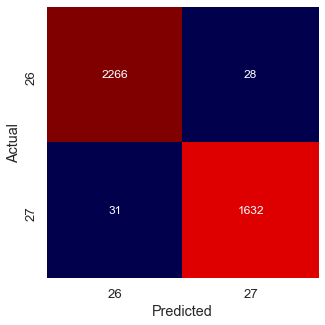

In [59]:
data = confusion_matrix(y_test4, y_pred_2)
df_cm = pd.DataFrame(data, columns=np.unique(y_test4), index = np.unique(y_test4))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=2000, square=True, fmt="d", cmap="seismic")

In [60]:
print('Tuned Model Stats:')
print(classification_report(y_test4, y_pred_2))

Tuned Model Stats:
              precision    recall  f1-score   support

          26       0.99      0.99      0.99      2294
          27       0.98      0.98      0.98      1663

    accuracy                           0.99      3957
   macro avg       0.98      0.98      0.98      3957
weighted avg       0.99      0.99      0.99      3957



### Using all Categories as Target

In [61]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(features, category, test_size=0.3, random_state=42)

pipe_0.fit(X_train5, y_train5)
train_score = pipe_0.score(X_train5, y_train5)
test_score = pipe_0.score(X_test5, y_test5)
y_pred_3=pipe_0.predict(X_test5)
print("Training Score for dataset %.2f", train_score)
print("Testing Score for dataset %.2f", test_score)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Score for dataset %.2f 0.9934091884929154
Testing Score for dataset %.2f 0.9170465360917698


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

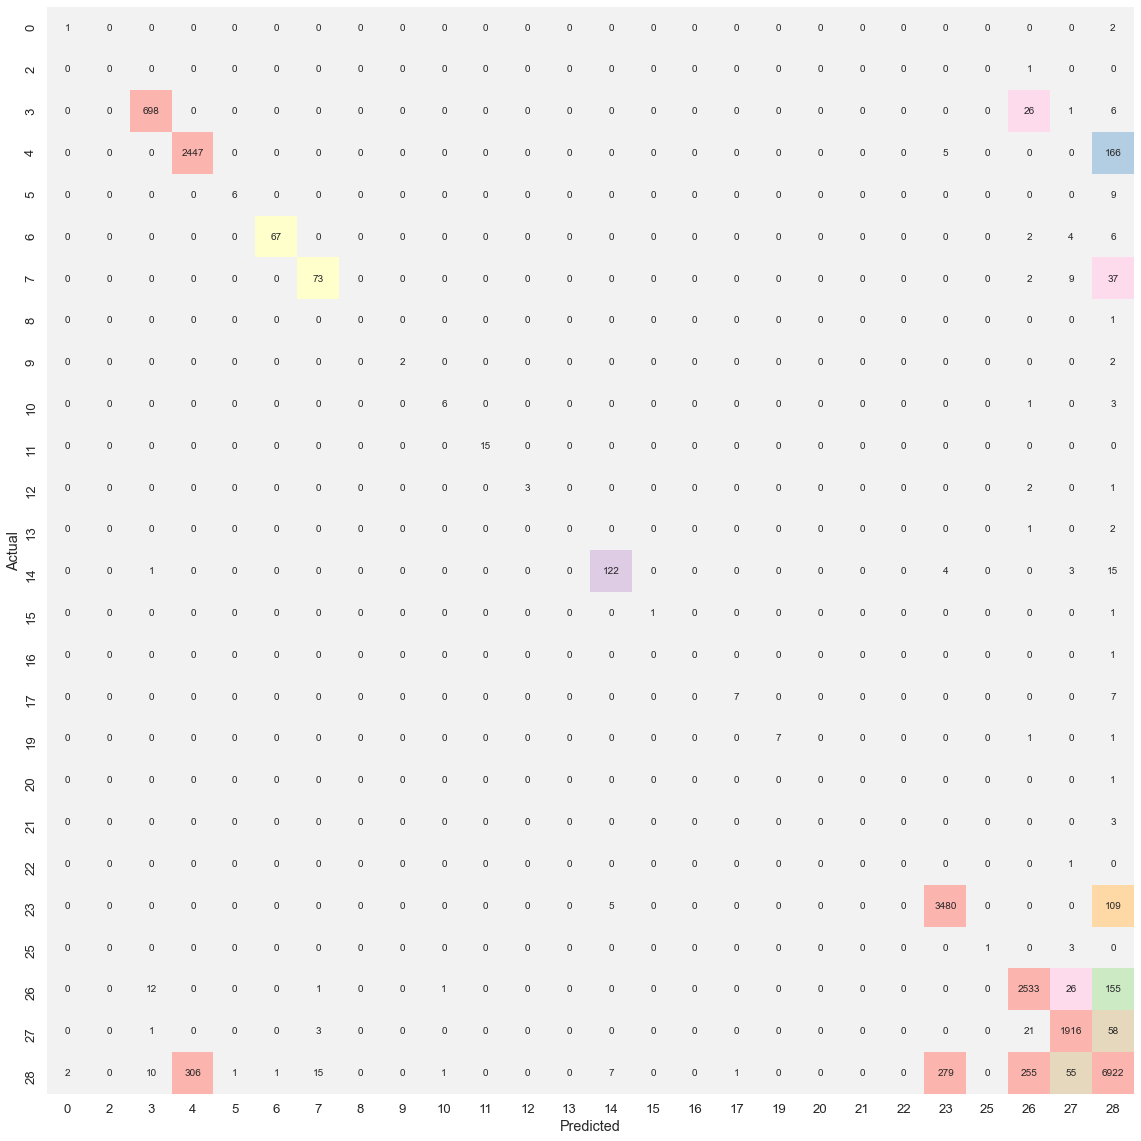

In [62]:
data = confusion_matrix(y_test5, y_pred_3)
df_cm = pd.DataFrame(data, columns=np.unique(y_test5), index = np.unique(y_test5))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10}, cbar=False,
          vmax=200, square=True, fmt="d", cmap="Pastel1_r")

In [63]:
print('Tuned Model Stats:')
print(classification_report(y_test5, y_pred_3))

Tuned Model Stats:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         1
           3       0.97      0.95      0.96       731
           4       0.89      0.93      0.91      2618
           5       0.86      0.40      0.55        15
           6       0.99      0.85      0.91        79
           7       0.79      0.60      0.69       121
           8       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         4
          10       0.75      0.60      0.67        10
          11       1.00      1.00      1.00        15
          12       1.00      0.50      0.67         6
          13       0.00      0.00      0.00         3
          14       0.91      0.84      0.87       145
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         1
          17       0.88      0.50      0.64        14
        

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Out of Sample Prediction

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features_copy_withAddress, family_copy_withAddress, test_size=0.25, random_state=42)
xgb_best.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
out_of_sample_df=pd.read_csv('Dataset/out-of-sample_dataset.csv')
out_of_sample_df

,address,length,weight,count,looped,neighbors,income,date_2
0,335155,1,1.0,2,1,2,400000000,16.360656
1,643232,24,3.5,873,0,3,999600000,16.672131
2,528624,0,1.0,62,4,4,36650000,16.879781
3,1093079,2,0.5,1,0,4,120000000,16.650273
4,118697,0,0.5,1,5,6,1000000,17.030055


In [66]:
predictions1=xgb_best.predict(out_of_sample_df)

In [67]:
for i,r in enumerate(predictions1):
    print("Row",i+1 ,"Ransomware Family is :",r)

Row 1 Ransomware Family is : 3
Row 2 Ransomware Family is : 1
Row 3 Ransomware Family is : 3
Row 4 Ransomware Family is : 0
Row 5 Ransomware Family is : 3


In [68]:
cat=[]
for i,r in enumerate(predictions1):
    if r==0:
        a=pipe_0.predict(out_of_sample_df[out_of_sample_df.index==i])
        cat.append(a)
    elif r==2:
        b=pipe_1.predict(out_of_sample_df[out_of_sample_df.index==i])
        cat.append(b)
    elif r==3:
        c=pipe_2.predict(out_of_sample_df[out_of_sample_df.index==i])
        cat.append(c)
    else:
        cat.append(1)


In [70]:
out_of_sample_results = pd.DataFrame(zip(predictions1,cat), columns=['Ransomware_Family','Category'])
out_of_sample_results

,Ransomware_Family,Category
0,3,[27]
1,1,1
2,3,[26]
3,0,[3]
4,3,[26]


## Conclusion

From the analysis, I have observed that chances of misclassification of the records are reduced if they are grouped, I was not able to impliment clustering due to having large volume of records which was bringing difficulty to analyze.

Instead of grouping using the clusters, I grouped the records using the general Ransomware Family therefore having 4 groups. Because of having huge dataset the accuracy with all categories is higher because its training from 50000 records while the groups might not show high accuracy but it is training from lesser records due to grouping